In [12]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np
import time

from src import model
from src import util
from src.body import Body
import config


In [2]:
body_estimation = Body('model/body_pose_model.pth')

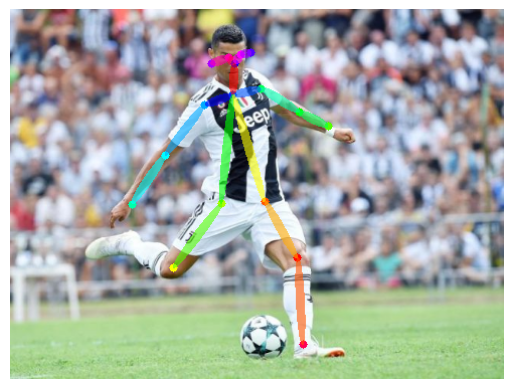

In [78]:
test_image = 'images/ronaldo1.jpg'
oriImg = cv2.imread(test_image)  # B,G,R order
scale =368/ oriImg.shape[0]
oriImg = cv2.resize(oriImg,None,fx=scale,fy=scale)
candidate, subset = body_estimation(oriImg)

canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, [subset])
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

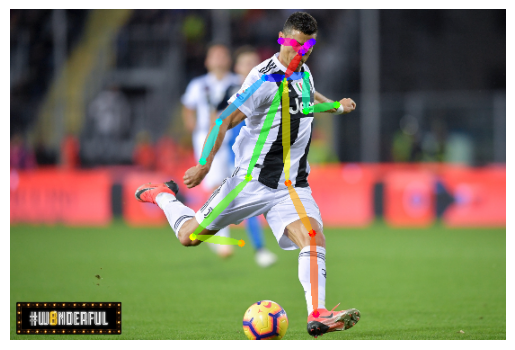

In [79]:
compare_image = 'images/ronaldo2.jpg'
compare_image = cv2.imread(compare_image)  # B,G,R order
scale =368/ compare_image.shape[0]
compare_image = cv2.resize(compare_image,None,fx=scale,fy=scale)
#oriImg = cv2.flip(oriImg,1)
candidate_cp, subset_cp = body_estimation(compare_image)

canvas = copy.deepcopy(compare_image)
canvas = util.draw_bodypose(canvas, candidate_cp, [subset_cp])
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

In [80]:
angles,kp,vector = body_estimation.compare(oriImg,compare_image)

In [81]:
angles

(array([-19.65382406,  -4.66334911,  -8.19153196,  11.71003616,
        -58.81502534,  37.40296162, -14.45705908,  -6.34019175,
          0.        , -15.32957107,  -4.00417294,  -1.44610872,
        -29.04384029]),
 0.8045762295411384)

In [82]:
a = np.array(config.limbSeqToCompare)[np.abs(angles[0])>10]
b = angles[0][np.abs(angles[0])>10]
c = vector[np.abs(angles[0])>10]
canvas1 = copy.deepcopy(compare_image)
for i in range(len(a)): 
    start_point = kp[a[i][1]-1][:2].astype(int)
    if abs(c[i][1])>abs(c[i][0]):
        end_point = [start_point[0] + int(b[i]/2) if c[i][1]>0 else start_point[0] - int(b[i]/2),start_point[1]]
    else:
        end_point = [start_point[0] ,start_point[1]+ int(b[i]/2) if c[i][1]>0 else start_point[1] - int(b[i]/2)]
    color = (0, 255, 0) 
    thickness = 2
    tip_length = 0.5
    cv2.arrowedLine(canvas1, start_point, end_point, color, thickness, tipLength=tip_length)

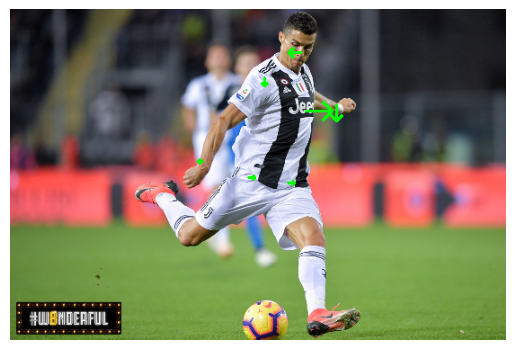

In [83]:
plt.imshow(canvas1[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()